In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import re

In [2]:
data = pd.read_csv(r"C:\Users\psath\Downloads\Images_captioning\archive\captions.txt")

In [3]:
data.head(5)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [4]:
data.shape

(40455, 2)

In [5]:
data.columns

Index(['image', 'caption'], dtype='object')

In [6]:
data['image'].value_counts()

1000268201_693b08cb0e.jpg    5
3388094307_5a83be64a5.jpg    5
3393394134_0caac47e1c.jpg    5
3393343330_b13df4d8ec.jpg    5
3393152604_27bd1037f2.jpg    5
                            ..
2699733386_c346c87ea6.jpg    5
2699426519_228719b1db.jpg    5
2699342860_5288e203ea.jpg    5
2699125097_c6801d80ed.jpg    5
997722733_0cb5439472.jpg     5
Name: image, Length: 8091, dtype: int64

In [7]:
len(data['image'].unique())

8091

In [8]:
ob=data.groupby(data['image'])

In [9]:
ob.groups

{'1000268201_693b08cb0e.jpg': [0, 1, 2, 3, 4], '1001773457_577c3a7d70.jpg': [5, 6, 7, 8, 9], '1002674143_1b742ab4b8.jpg': [10, 11, 12, 13, 14], '1003163366_44323f5815.jpg': [15, 16, 17, 18, 19], '1007129816_e794419615.jpg': [20, 21, 22, 23, 24], '1007320043_627395c3d8.jpg': [25, 26, 27, 28, 29], '1009434119_febe49276a.jpg': [30, 31, 32, 33, 34], '1012212859_01547e3f17.jpg': [35, 36, 37, 38, 39], '1015118661_980735411b.jpg': [40, 41, 42, 43, 44], '1015584366_dfcec3c85a.jpg': [45, 46, 47, 48, 49], '101654506_8eb26cfb60.jpg': [50, 51, 52, 53, 54], '101669240_b2d3e7f17b.jpg': [55, 56, 57, 58, 59], '1016887272_03199f49c4.jpg': [60, 61, 62, 63, 64], '1019077836_6fc9b15408.jpg': [65, 66, 67, 68, 69], '1019604187_d087bf9a5f.jpg': [70, 71, 72, 73, 74], '1020651753_06077ec457.jpg': [75, 76, 77, 78, 79], '1022454332_6af2c1449a.jpg': [80, 81, 82, 83, 84], '1022454428_b6b660a67b.jpg': [85, 86, 87, 88, 89], '1022975728_75515238d8.jpg': [90, 91, 92, 93, 94], '102351840_323e3de834.jpg': [95, 96, 97, 9

In [10]:
ob.get_group('1000268201_693b08cb0e.jpg')

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [11]:
ob.get_group('1000268201_693b08cb0e.jpg')['caption']

0    A child in a pink dress is climbing up a set o...
1                A girl going into a wooden building .
2     A little girl climbing into a wooden playhouse .
3    A little girl climbing the stairs to her playh...
4    A little girl in a pink dress going into a woo...
Name: caption, dtype: object

In [12]:
ob.groups.keys()

dict_keys(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg', '1015584366_dfcec3c85a.jpg', '101654506_8eb26cfb60.jpg', '101669240_b2d3e7f17b.jpg', '1016887272_03199f49c4.jpg', '1019077836_6fc9b15408.jpg', '1019604187_d087bf9a5f.jpg', '1020651753_06077ec457.jpg', '1022454332_6af2c1449a.jpg', '1022454428_b6b660a67b.jpg', '1022975728_75515238d8.jpg', '102351840_323e3de834.jpg', '1024138940_f1fefbdce1.jpg', '102455176_5f8ead62d5.jpg', '1026685415_0431cbf574.jpg', '1028205764_7e8df9a2ea.jpg', '1030985833_b0902ea560.jpg', '103106960_e8a41d64f8.jpg', '103195344_5d2dc613a3.jpg', '103205630_682ca7285b.jpg', '1032122270_ea6f0beedb.jpg', '1032460886_4a598ed535.jpg', '1034276567_49bb87c51c.jpg', '104136873_5b5d41be75.jpg', '1042020065_fb3d3ba5ba.jpg', '1042590306_95dea0916c.jpg', '1045521051

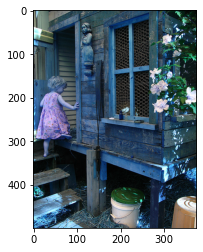

0    A child in a pink dress is climbing up a set o...
1                A girl going into a wooden building .
2     A little girl climbing into a wooden playhouse .
3    A little girl climbing the stairs to her playh...
4    A little girl in a pink dress going into a woo...
Name: caption, dtype: object


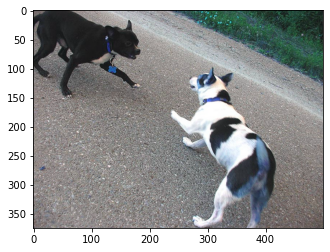

5           A black dog and a spotted dog are fighting
6    A black dog and a tri-colored dog playing with...
7    A black dog and a white dog with brown spots a...
8    Two dogs of different breeds looking at each o...
9      Two dogs on pavement moving toward each other .
Name: caption, dtype: object


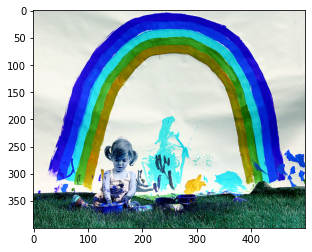

10    A little girl covered in paint sits in front o...
11    A little girl is sitting in front of a large p...
12    A small girl in the grass plays with fingerpai...
13    There is a girl with pigtails sitting in front...
14    Young girl with pigtails painting outside in t...
Name: caption, dtype: object


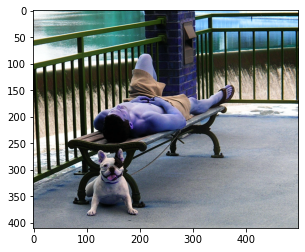

15    A man lays on a bench while his dog sits by him .
16    A man lays on the bench to which a white dog i...
17    a man sleeping on a bench outside with a white...
18    A shirtless man lies on a park bench with his ...
19    man laying on bench holding leash of dog sitti...
Name: caption, dtype: object


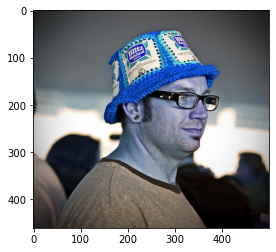

20       A man in an orange hat starring at something .
21              A man wears an orange hat and glasses .
22    A man with gauges and glasses is wearing a Bli...
23    A man with glasses is wearing a beer can croch...
24    The man with pierced ears is wearing glasses a...
Name: caption, dtype: object


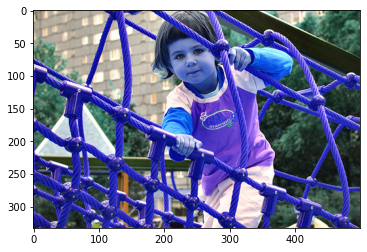

25                      A child playing on a rope net .
26               A little girl climbing on red roping .
27    A little girl in pink climbs a rope bridge at ...
28    A small child grips onto the red ropes at the ...
29    The small child climbs on a red ropes on a pla...
Name: caption, dtype: object


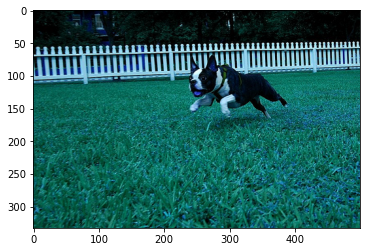

30    A black and white dog is running in a grassy g...
31    A black and white dog is running through the g...
32           A Boston terrier is running in the grass .
33    A Boston Terrier is running on lush green gras...
34    A dog runs on the green grass near a wooden fe...
Name: caption, dtype: object


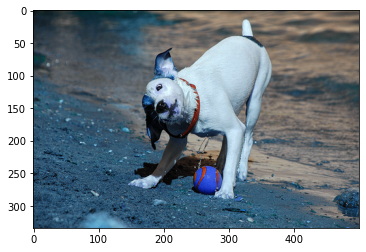

35    A dog shakes its head near the shore , a red b...
36    A white dog shakes on the edge of a beach with...
37    Dog with orange ball at feet , stands on shore...
38    White dog playing with a red ball on the shore...
39    White dog with brown ears standing near water ...
Name: caption, dtype: object


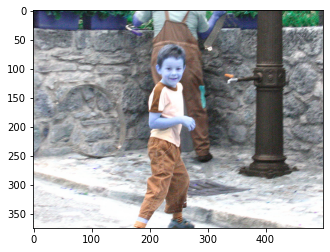

40    A boy smiles in front of a stony wall in a city .
41    A little boy is standing on the street while a...
42                  A young boy runs aross the street .
43    A young child is walking on a stone paved stre...
44    Smiling boy in white shirt and blue jeans in f...
Name: caption, dtype: object


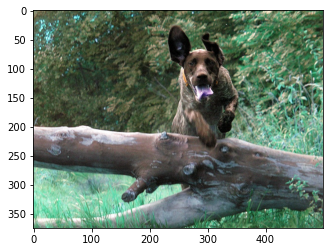

45                       A black dog leaps over a log .
46           A grey dog is leaping over a fallen tree .
47               A large black dog leaps a fallen log .
48    A mottled black and grey dog in a blue collar ...
49                The black dog jumped the tree stump .
Name: caption, dtype: object


In [13]:
count = 0
for y in ob.groups.keys():
    img = cv2.imread(r'C:\Users\psath\Downloads\Images_captioning\archive\Images\{}'.format(y))
    plt.imshow(img)
    plt.show()
    print(ob.get_group(y)['caption'])
    count += 1
    if count == 10:
        break

# Text Preprocessing

In [14]:
data

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [15]:
data[['caption']]

,caption
0,A child in a pink dress is climbing up a set o...
1,A girl going into a wooden building .
2,A little girl climbing into a wooden playhouse .
3,A little girl climbing the stairs to her playh...
4,A little girl in a pink dress going into a woo...
...,...
40450,A man in a pink shirt climbs a rock face
40451,A man is rock climbing high in the air .
40452,A person in a red shirt climbing up a rock fac...
40453,A rock climber in a red shirt .


In [16]:
data_copy =data.copy()

In [17]:
data_copy[['caption']] = data_copy[['caption']].applymap(lambda x: x.lower()).applymap(lambda x:re.sub("[^a-z]"," ",x))

In [18]:
data_copy[['caption']]

,caption
0,a child in a pink dress is climbing up a set o...
1,a girl going into a wooden building
2,a little girl climbing into a wooden playhouse
3,a little girl climbing the stairs to her playh...
4,a little girl in a pink dress going into a woo...
...,...
40450,a man in a pink shirt climbs a rock face
40451,a man is rock climbing high in the air
40452,a person in a red shirt climbing up a rock fac...
40453,a rock climber in a red shirt


In [19]:
def rem(x):
    x1 = x.split()
    e = []
    for word in x1:
        if len(word)>1:
            e.append(word)
    new_word = " ".join(e)
    return new_word

In [20]:
rem("a child in a pink dress")

'child in pink dress'

In [21]:
data_copy[["caption"]]=data_copy[['caption']].applymap(rem)

In [22]:
data_copy

,image,caption
0,1000268201_693b08cb0e.jpg,child in pink dress is climbing up set of stai...
1,1000268201_693b08cb0e.jpg,girl going into wooden building
2,1000268201_693b08cb0e.jpg,little girl climbing into wooden playhouse
3,1000268201_693b08cb0e.jpg,little girl climbing the stairs to her playhouse
4,1000268201_693b08cb0e.jpg,little girl in pink dress going into wooden cabin
...,...,...
40450,997722733_0cb5439472.jpg,man in pink shirt climbs rock face
40451,997722733_0cb5439472.jpg,man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,person in red shirt climbing up rock face cove...
40453,997722733_0cb5439472.jpg,rock climber in red shirt


In [23]:
data_copy[["caption"]]=data_copy[["caption"]].applymap(lambda x:"startseq "+x+" endseq")

In [24]:
data_copy

,image,caption
0,1000268201_693b08cb0e.jpg,startseq child in pink dress is climbing up se...
1,1000268201_693b08cb0e.jpg,startseq girl going into wooden building endseq
2,1000268201_693b08cb0e.jpg,startseq little girl climbing into wooden play...
3,1000268201_693b08cb0e.jpg,startseq little girl climbing the stairs to he...
4,1000268201_693b08cb0e.jpg,startseq little girl in pink dress going into ...
...,...,...
40450,997722733_0cb5439472.jpg,startseq man in pink shirt climbs rock face en...
40451,997722733_0cb5439472.jpg,startseq man is rock climbing high in the air ...
40452,997722733_0cb5439472.jpg,startseq person in red shirt climbing up rock ...
40453,997722733_0cb5439472.jpg,startseq rock climber in red shirt endseq


In [25]:
import keras

In [26]:
from keras.applications import VGG19,ResNet50,VGG16
from keras.models import Sequential
from keras import Model

In [27]:
VGG = VGG16(weights="imagenet", input_shape=(224,224,3))

In [28]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
model = Model(VGG.input, VGG.layers[-4].output)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
count = 0
final_in = {}
for y in data_copy["image"]:
    img = cv2.imread(r"C:\Users\psath\Downloads\Images_captioning\archive\Images\{}".format(y))
    img = cv2.resize(img,(224,224))
    img = img/255.0
    img = img.reshape((1,224,224,3))
    ot = model.predict(img)
    final1 = ot.reshape((-1))
    final_in.update({y+str(count):final1})
    count+=1

1/1 [==============================] - 0s 403ms/step


1/1 [==============================] - 0s 464ms/step


1/1 [==============================] - 0s 394ms/step


1/1 [==============================] - 0s 372ms/step


1/1 [==============================] - ETA: 0s

In [31]:
import pickle

In [ ]:
with open(r"C:\Users\psath\Downloads\Images_captioning\final.pkl","wb") as t:
    pickle.dump(final_in,t)

In [32]:
file=open(r"C:\Users\psath\Downloads\Images_captioning\final.pkl","rb")
object1=pickle.load(file)

In [33]:
object1

{'1000268201_693b08cb0e.jpg': array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([0.5978118 , 0.        , 0.76468253, ..., 0.        , 0.8336367 ,
        0.        ], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([0.       , 0.       , 0.       , ..., 0.       , 0.7713126,
        0.       ], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.       , 0.       , 0.       , ..., 0.       , 0.8780243,
        0.       ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.07065523, 0.        , 0.        , ..., 0.        , 1.305239  ,
        0.        ], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.0551016, 0.       , 0.       , ..., 0.       , 1.3730643,
        0.       ], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.25466207, 0.        , 0.        , ..., 0.        , 1.0098948 ,
        0.        ], dtype=float32),
 '1012212859_01547e3f17.jpg': array([0.455333

In [34]:
list(object1.values())[0].shape

(25088,)

In [35]:
l=set()
for y in data_copy["caption"].values:
    l.update(y.split())
    

In [36]:
len(l)

8426

In [37]:
data_copy[["caption"]].applymap(lambda x:len(x.split())).max()

caption    35
dtype: int64

In [38]:
word_index={}
for key,word in enumerate(l,start=1):
    word_index.update({word:key})

In [39]:
word_index

{'fenced': 1,
 'quietly': 2,
 'anything': 3,
 'shiny': 4,
 'trampoline': 5,
 'sveral': 6,
 'blitz': 7,
 'desert': 8,
 'ritz': 9,
 'built': 10,
 'records': 11,
 'persue': 12,
 'facefirst': 13,
 'coarse': 14,
 'bringing': 15,
 'overhead': 16,
 'accompanying': 17,
 'glowing': 18,
 'below': 19,
 'asleep': 20,
 'stunt': 21,
 'zooming': 22,
 'womand': 23,
 'books': 24,
 'pokes': 25,
 'sharing': 26,
 'democrat': 27,
 'punch': 28,
 'source': 29,
 'swept': 30,
 'sundown': 31,
 'lamb': 32,
 'sash': 33,
 'faces': 34,
 'scene': 35,
 'expressionless': 36,
 'peddal': 37,
 'paved': 38,
 'modeling': 39,
 'soccer': 40,
 'attempts': 41,
 'fisherman': 42,
 'sets': 43,
 'pet': 44,
 'cuts': 45,
 'footbridge': 46,
 'wants': 47,
 'hair': 48,
 'dust': 49,
 'canoeing': 50,
 'hundreds': 51,
 'dupar': 52,
 'certificate': 53,
 'close': 54,
 'logos': 55,
 'campground': 56,
 'trimmed': 57,
 'heads': 58,
 'whiffle': 59,
 'suggestive': 60,
 'beckons': 61,
 'collarless': 62,
 'punk': 63,
 'curtain': 64,
 'romantically

In [40]:
data_copy[["caption"]].shape

(40455, 1)

In [41]:
sent=data_copy[["caption"]].iloc[0].values[0].split()

In [42]:
sent

['startseq',
 'child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 'endseq']

In [43]:
object1[data_copy[["image"]].iloc[0].values[0]]

array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
       0.        ], dtype=float32)

In [44]:
from keras.utils import pad_sequences
from keras.utils import to_categorical

In [45]:
img_vectors =[]
text_encodings =[]
labels = []
for i in range(0,2500):
    sent = data_copy[['caption']].iloc[i].values[0].split()
    for word in range(1,len(sent)):
        img_vectors.append(object1[data_copy[['image']].iloc[i].values[0]])

        x1 = sent[0:word]
        x2 = sent[word]

        t1 = []
        for w in x1:
            t1.append(word_index[w])
        text_encodings.append(pad_sequences([t1], maxlen= 35, padding='post')[0])
        label = word_index[x2]
        labels.append(to_categorical(label,num_classes=8427))

In [46]:
img_vectors

[array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
        0.        ], dtype=float32),
 array([0.

In [47]:
text_encodings

[array([2526,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]),
 array([2526, 8388,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]),
 array([2526, 8388, 8019,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]),
 array([2526, 8388, 8019, 5147,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]),
 array([2526, 8388, 8019

In [48]:
labels

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [49]:
import keras
from keras.layers import Dense,Embedding,LSTM,add,Input
from keras import Model

In [55]:
i1=Input(shape=(35,))
out1=Embedding(input_dim=8426+1,output_dim=40)(i1)
o2=LSTM(256)(out1)

i11=Input(shape=(25088,))
o3=Dense(256,activation="relu")(i11)

o4=add([o3,o2])
finalo=Dense(8427,activation="softmax")(o4)

In [56]:
model=Model(inputs=[i11,i1],outputs=[finalo])

In [57]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 25088)]      0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 35, 40)       337080      ['input_4[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 256)          6422784     ['input_5[0][0]']                
                                                                                            

In [58]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [61]:
model.fit([np.array(img_vectors),np.array(text_encodings)],np.array(labels),epochs= 5, batch_size = 300)

Epoch 1/5
88/88 [==============================] - 65s 672ms/step - loss: 5.2400 - accuracy: 0.0943
Epoch 2/5
88/88 [==============================] - 51s 581ms/step - loss: 5.2876 - accuracy: 0.0932
Epoch 3/5
88/88 [==============================] - 49s 563ms/step - loss: 5.1823 - accuracy: 0.0942
Epoch 4/5
88/88 [==============================] - 50s 572ms/step - loss: 5.1468 - accuracy: 0.0957
Epoch 5/5
88/88 [==============================] - 50s 569ms/step - loss: 5.1050 - accuracy: 0.0991
